#1. Làm sạch dữ liệu

In [ ]:
# Đọc dữ liệu
control <- read.csv("control_group.csv")
test <- read.csv("test_group.csv")

# Thêm cột chiến lược giá thầu
control$BiddingStrategy <- "maximum bidding"
test$BiddingStrategy <- "average bidding"

# Gộp hai tập dữ liệu
data <- rbind(control, test)

##1.1. Xử lý giá trị thiếu và ngoại lệ (outliers)

In [ ]:
# Kiểm tra và xử lý giá trị thiếu
summary(data)  # tổng quan dữ liệu
data <- na.omit(data)  # loại bỏ dòng có NA (hoặc có thể dùng median nếu muốn)

   Impression         Click         Purchase        Earning    
 Min.   : 45476   Min.   :1837   Min.   :267.0   Min.   :1254  
 1st Qu.: 95064   1st Qu.:3633   1st Qu.:458.0   1st Qu.:1946  
 Median :114037   Median :4322   Median :532.0   Median :2206  
 Mean   :111112   Mean   :4534   Mean   :566.5   Mean   :2212  
 3rd Qu.:124139   3rd Qu.:5273   3rd Qu.:679.2   3rd Qu.:2541  
 Max.   :158606   Max.   :7959   Max.   :890.0   Max.   :3171  
 BiddingStrategy   
 Length:80         
 Class :character  
 Mode  :character  
                   
                   
                   

In [ ]:
# Loại bỏ outliers bằng IQR method cho Click, Purchase, Earning
remove_outliers <- function(x) {
  Q1 <- quantile(x, 0.25)
  Q3 <- quantile(x, 0.75)
  IQR <- Q3 - Q1
  x >= (Q1 - 1.5 * IQR) & x <= (Q3 + 1.5 * IQR)
}

data <- data[
  remove_outliers(data$Click) &
  remove_outliers(data$Purchase) &
  remove_outliers(data$Earning),
]

##1.2. Kiểm tra định dạng dữ liệu

In [ ]:
# Kiểm tra kiểu dữ liệu
str(data)  # đảm bảo Impression, Click, Purchase, Earning là số

# Kiểm tra nhóm chiến lược giá thầu
table(data$BiddingStrategy)

'data.frame':	79 obs. of  5 variables:
 $ Impression     : int  82529 98050 82696 109914 108458 77774 95111 106649 122710 79498 ...
 $ Click          : int  6090 3383 4168 4911 5988 4462 3556 4358 5092 6654 ...
 $ Purchase       : int  665 315 458 487 441 520 513 747 746 471 ...
 $ Earning        : int  2311 1743 1798 1696 1544 2082 1815 1965 1652 2456 ...
 $ BiddingStrategy: chr  "maximum bidding" "maximum bidding" "maximum bidding" "maximum bidding" ...



average bidding maximum bidding 
             40              39 

##1.3. Tính các biến mới cần thiết

In [ ]:
# Tính các biến mới:
# CTR
data$CTR <- with(data, Click / Impression)

#Conversion Rate
data$ConversionRate <- with(data, ifelse(Click == 0, 0, Purchase / Click))

#2. Trực quan hóa dữ liệu

##2.1. Phân tích phân phối từng biến

In [ ]:
# 1. Cài đặt (chỉ cần 1 lần duy nhất)
install.packages("ggplot2")

# 2. Nạp thư viện (bắt buộc mỗi lần mở R mới)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



###Histogram để xem phân phối các biến (Click, Purchase, Earnings, CTR, Conversion Rate).

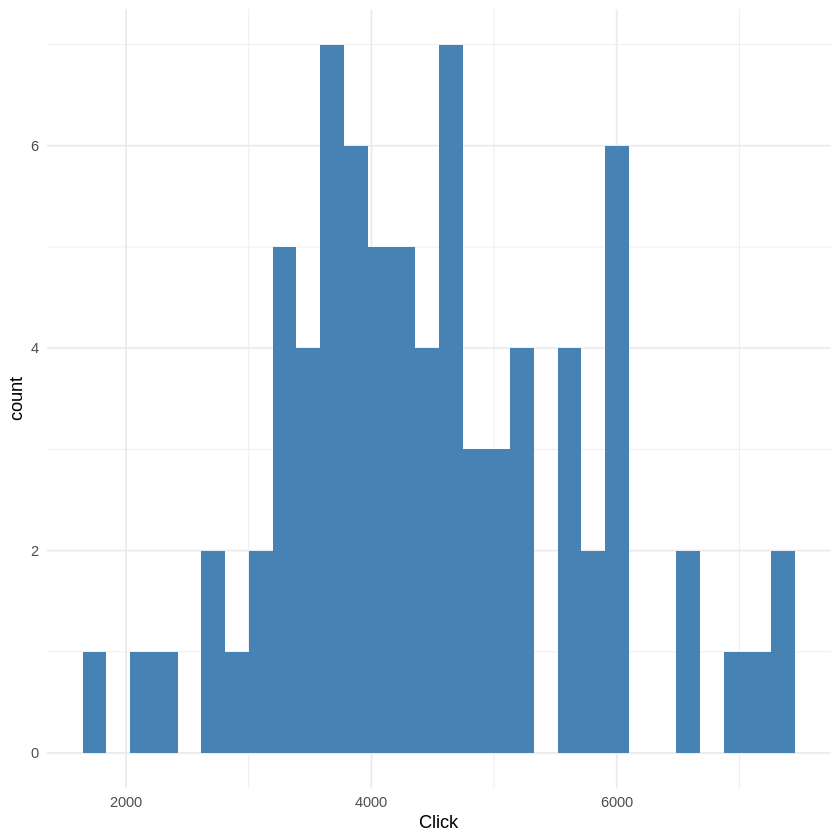

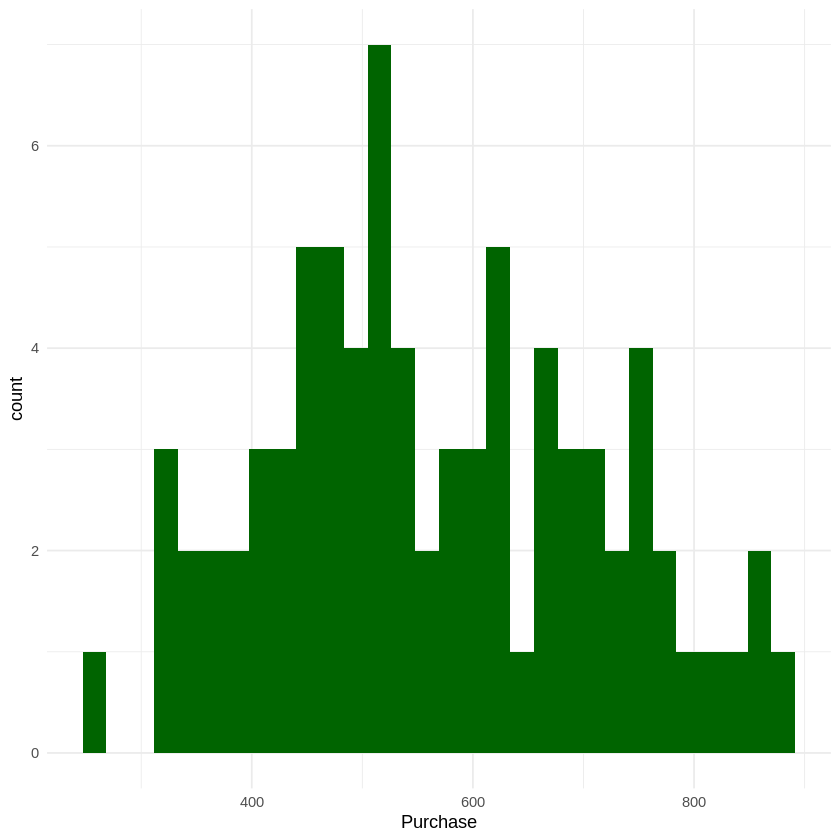

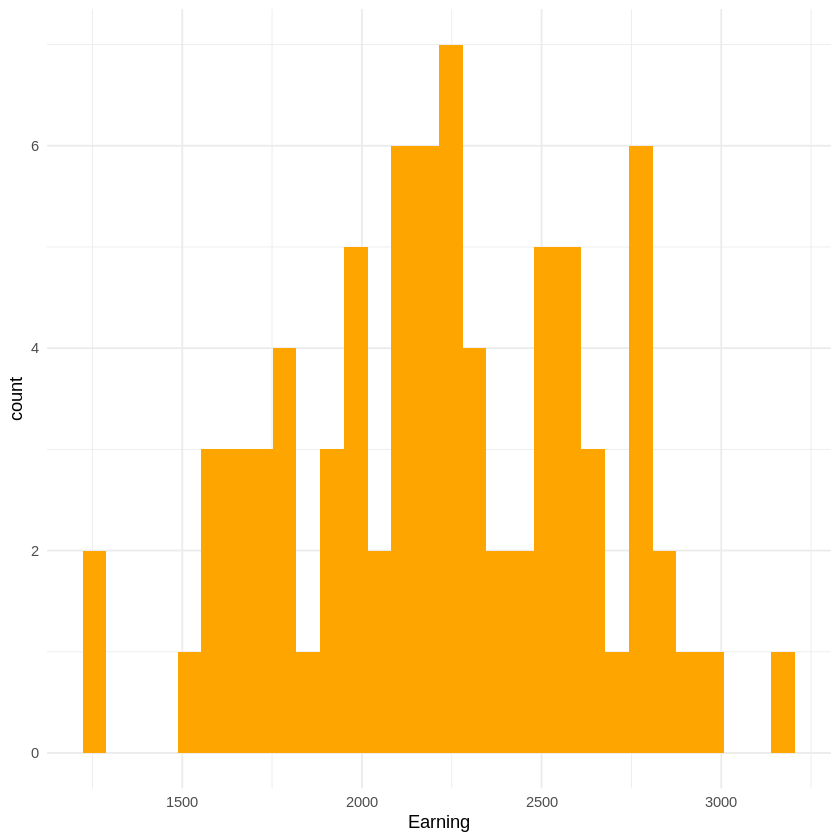

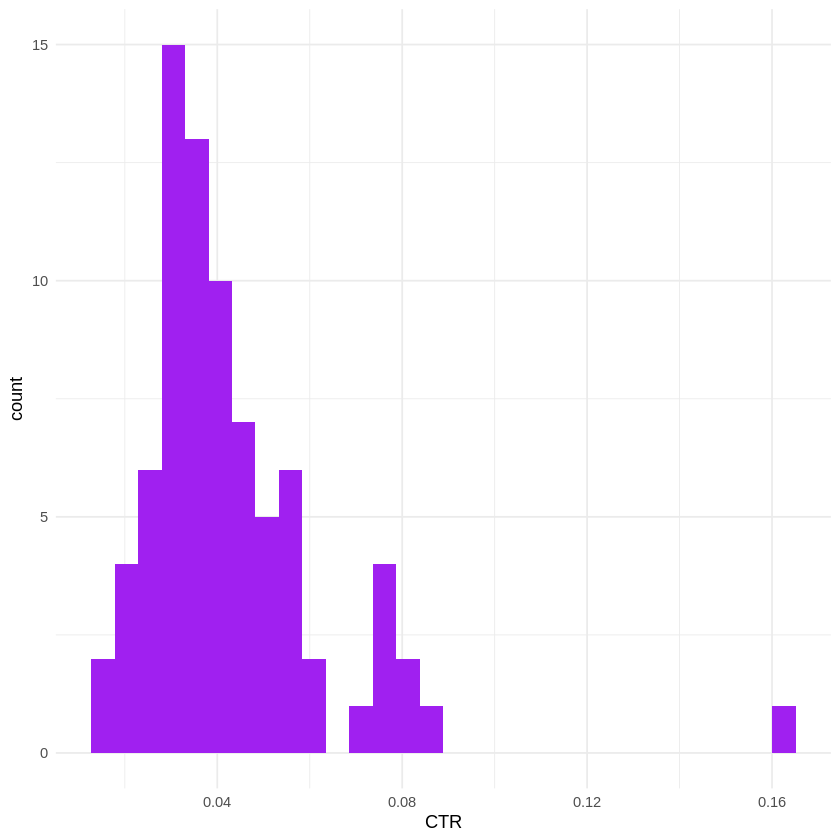

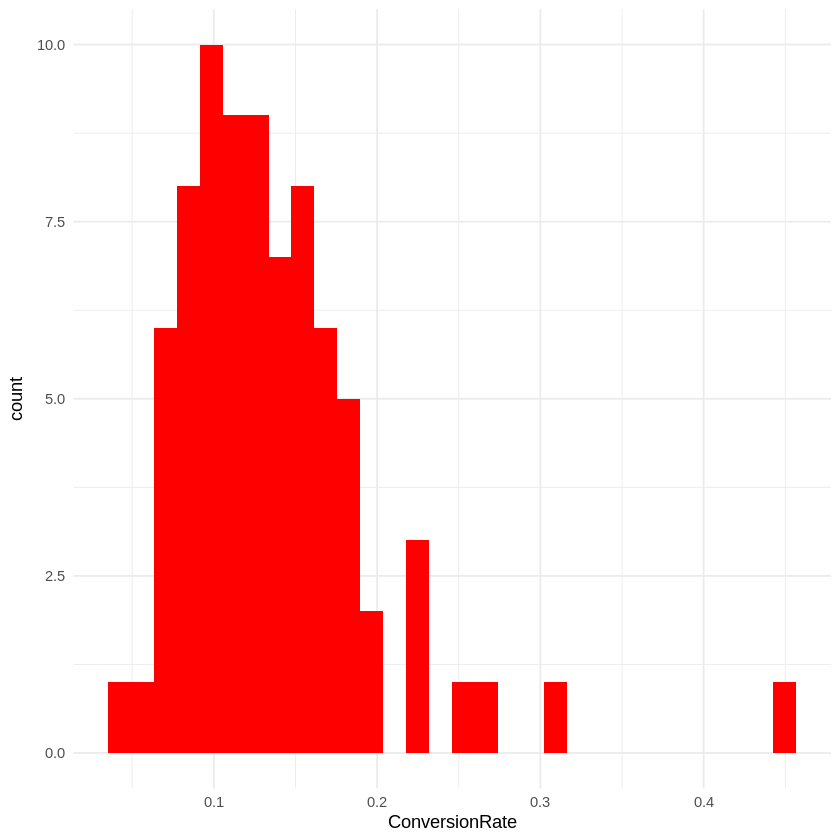

In [ ]:
# Click
ggplot(data, aes(x = Click)) + geom_histogram(bins = 30, fill = "steelblue") + theme_minimal()

# Purchase
ggplot(data, aes(x = Purchase)) + geom_histogram(bins = 30, fill = "darkgreen") + theme_minimal()

# Earnings
ggplot(data, aes(x = Earning)) + geom_histogram(bins = 30, fill = "orange") + theme_minimal()

# CTR
ggplot(data, aes(x = CTR)) + geom_histogram(bins = 30, fill = "purple") + theme_minimal()

# Conversion Rate
ggplot(data, aes(x = ConversionRate)) + geom_histogram(bins = 30, fill = "red") + theme_minimal()

**Tổng kết phân phối các biến**

**Click**

  * Phân phối gần chuẩn, hơi lệch phải nhẹ.
  * Không có ngoại lệ rõ rệt.

**Purchase**

  * Phân phối khá chuẩn, tập trung quanh khoảng 400–700.

**Earning**

  * Phân phối **rất gần chuẩn**, hình chuông rõ rệt.

**CTR (Click Through Rate)**

  * Lệch phải rõ rệt, tập trung ở mức thấp (0.02–0.05).
  * Có vài giá trị cao bất thường.

**Conversion Rate**

  * Lệch phải, xuất hiện vài giá trị ngoại lệ (trên 0.3–0.4).
  * Phần lớn tập trung ở khoảng 0.08–0.15.

###Boxplot để phát hiện ngoại lệ và so sánh sự phân tán giữa hai nhóm bidding.

In [ ]:
# Cài và load các gói cần thiết
install.packages("ggplot2")
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



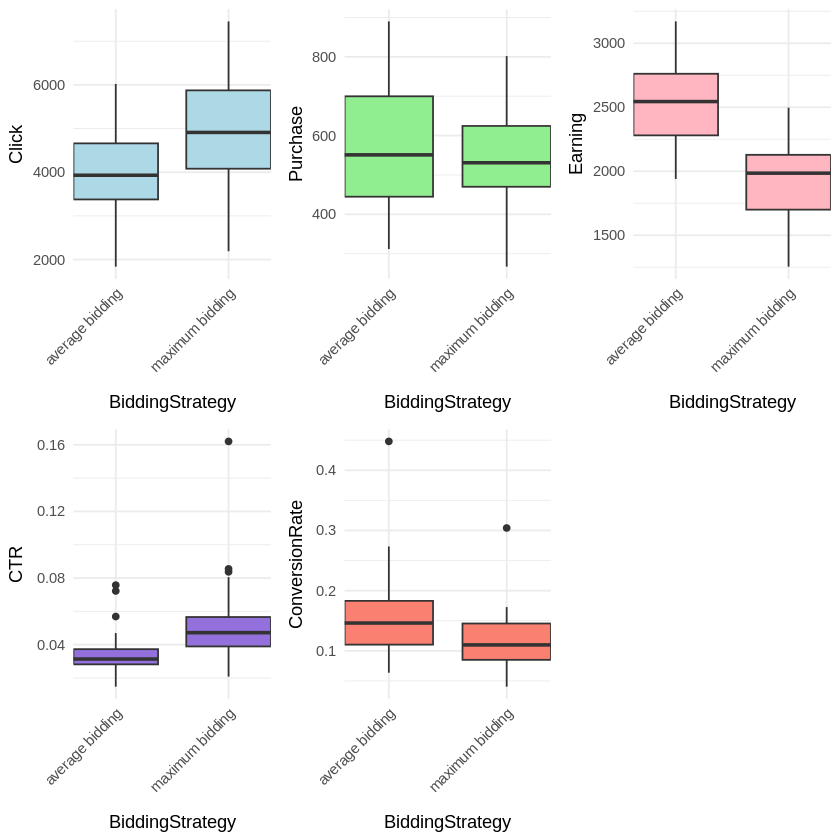

In [ ]:
library(ggplot2)
library(gridExtra)

# data$BiddingStrategy <- factor(data$BiddingStrategy,
#                                labels = c("Avg", "Min", "Max"))

# Biểu đồ 1: Click
p1 <- ggplot(data, aes(x = BiddingStrategy, y = Click)) +
  geom_boxplot(fill = "lightblue") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_x_discrete(expand = expansion(mult = c(0.2, 0.2)))

# Biểu đồ 2: Purchase
p2 <- ggplot(data, aes(x = BiddingStrategy, y = Purchase)) +
  geom_boxplot(fill = "lightgreen") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_x_discrete(expand = expansion(mult = c(0.2, 0.2)))

# Biểu đồ 3: Earning
p3 <- ggplot(data, aes(x = BiddingStrategy, y = Earning)) +
  geom_boxplot(fill = "lightpink") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_x_discrete(expand = expansion(mult = c(0.2, 0.2)))

# Biểu đồ 4: CTR
p4 <- ggplot(data, aes(x = BiddingStrategy, y = CTR)) +
  geom_boxplot(fill = "mediumpurple") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_x_discrete(expand = expansion(mult = c(0.2, 0.2)))

# Biểu đồ 5: Conversion Rate
p5 <- ggplot(data, aes(x = BiddingStrategy, y = ConversionRate)) +
  geom_boxplot(fill = "salmon") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_x_discrete(expand = expansion(mult = c(0.2, 0.2)))

# Hiển thị tất cả
grid.arrange(p1, p2, p3, p4, p5, ncol = 3)


**Click:**

- Không có ngoại lệ.

- Maximum bidding có Click trung bình và biến động cao hơn.

**Purchase:**

- Không có ngoại lệ.

- Average bidding có số Purchase trung bình cao hơn và phân tán lớn hơn.

**Earning:**

- Không có ngoại lệ.

- Average bidding giúp tạo doanh thu cao hơn.

**CTR:**

- Có ngoại lệ rõ rệt, nhất là ở maximum bidding.

- CTR cao hơn ở nhóm maximum, nhưng dao động mạnh hơn.

**Conversion Rate:**

- Có một số ngoại lệ ở maximum bidding.

- Average bidding có tỷ lệ chuyển đổi cao hơn và ổn định hơn.

##2.2. So sánh trung bình giữa hai chiến lược


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




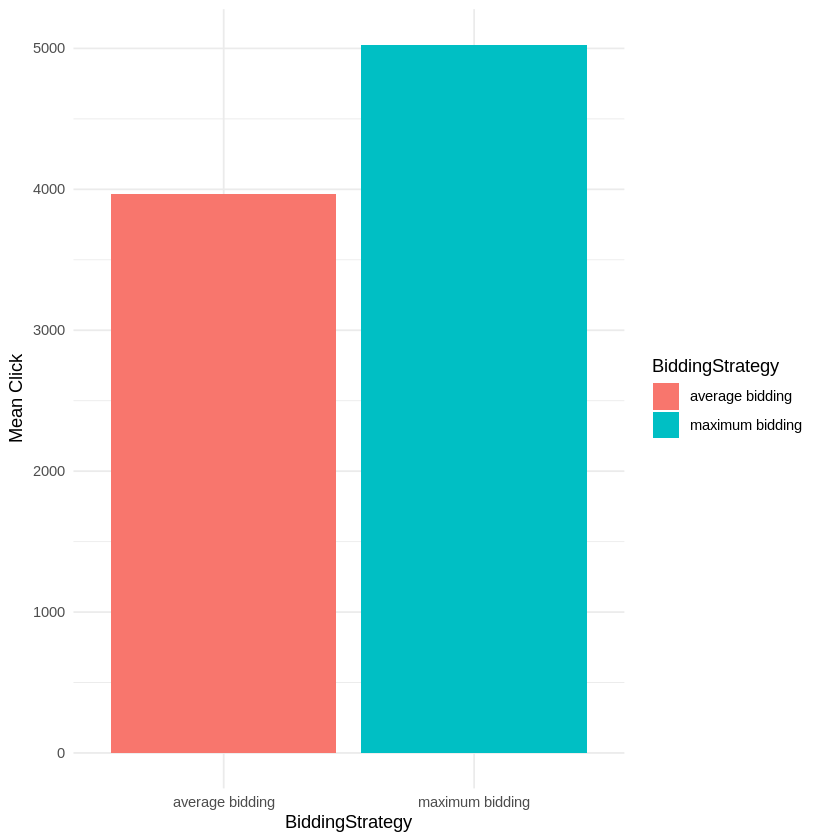

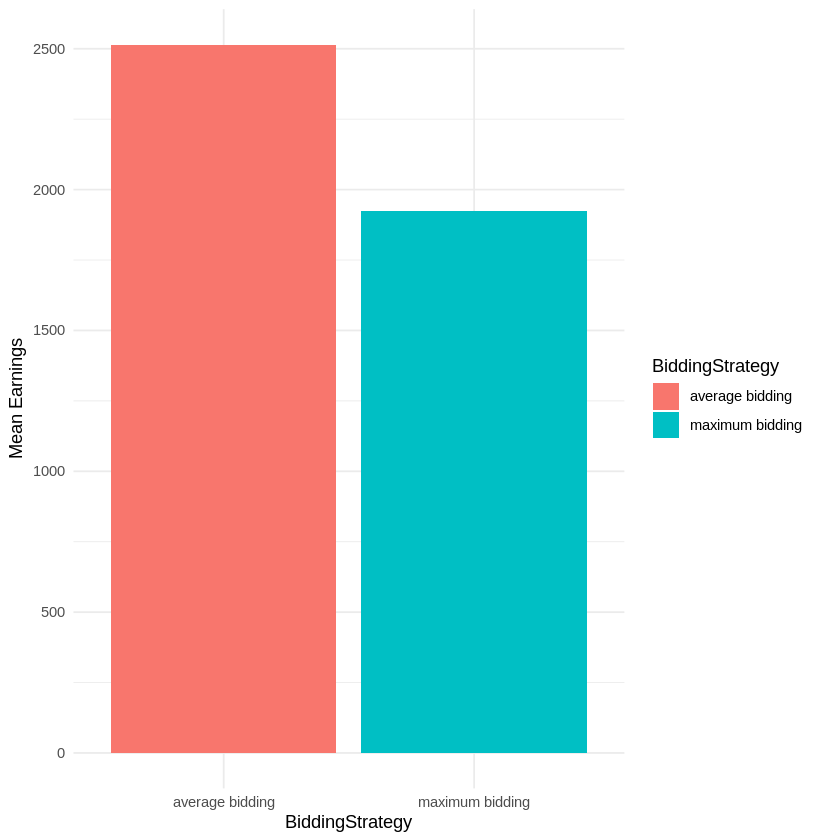

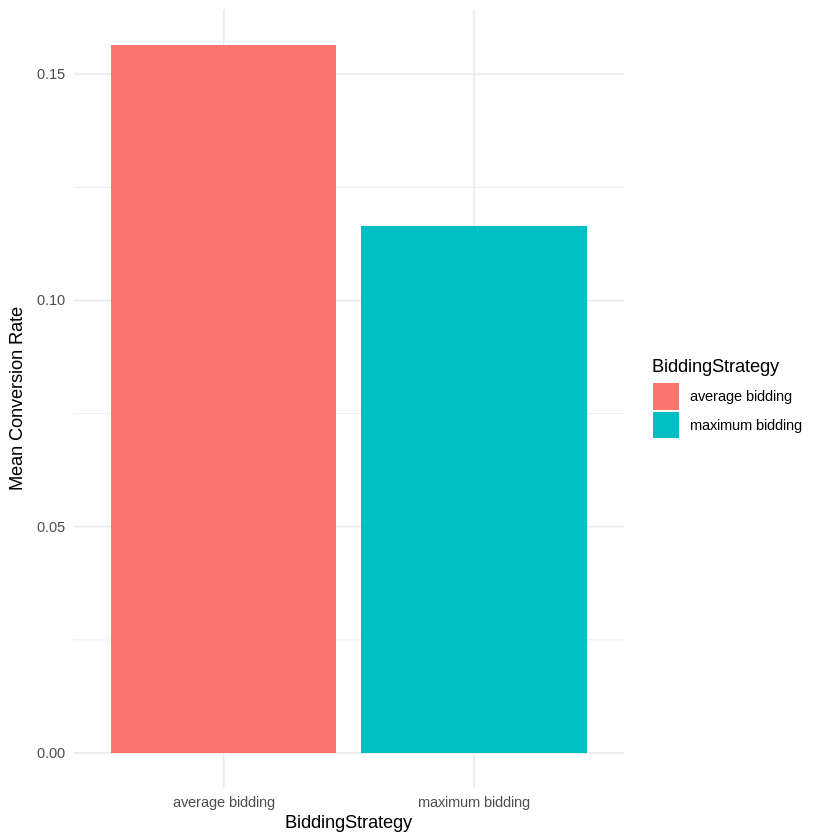

In [ ]:
library(dplyr)

# Tính trung bình
avg_stats <- data %>%
  group_by(BiddingStrategy) %>%
  summarise(
    mean_click = mean(Click),
    mean_earning = mean(Earning),
    mean_cr = mean(ConversionRate)
  )

# Trung bình Click
ggplot(avg_stats, aes(x = BiddingStrategy, y = mean_click, fill = BiddingStrategy)) +
  geom_bar(stat = "identity") + ylab("Mean Click") + theme_minimal()

# Trung bình Earnings
ggplot(avg_stats, aes(x = BiddingStrategy, y = mean_earning, fill = BiddingStrategy)) +
  geom_bar(stat = "identity") + ylab("Mean Earnings") + theme_minimal()

# Trung bình Conversion Rate
ggplot(avg_stats, aes(x = BiddingStrategy, y = mean_cr, fill = BiddingStrategy)) +
  geom_bar(stat = "identity") + ylab("Mean Conversion Rate") + theme_minimal()

**Click trung bình:**

- Cao hơn ở maximum bidding

→ Thích hợp nếu mục tiêu là lượt truy cập nhiều

**Earnings trung bình:**

- Cao hơn ở average bidding

→ Hiệu quả tài chính tốt hơn với ngân sách tối ưu hơn

**Conversion Rate trung bình:**

- Cao hơn ở average bidding

→ Phù hợp nếu doanh nghiệp tập trung chuyển đổi và hiệu quả mua hàng

##2.3. Phân tích mối quan hệ giữa các biến

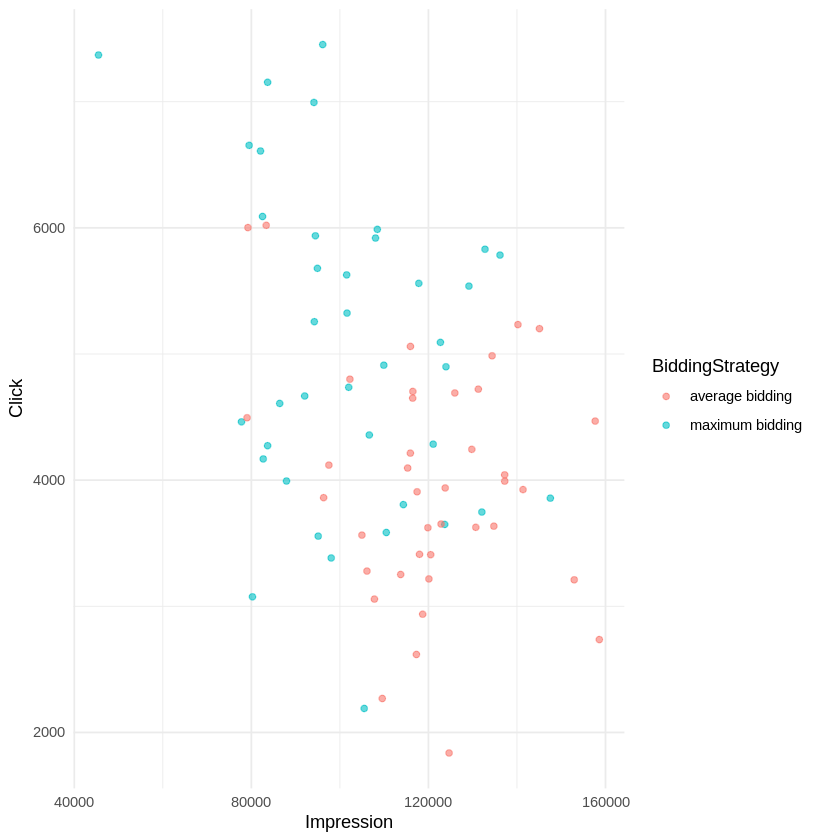

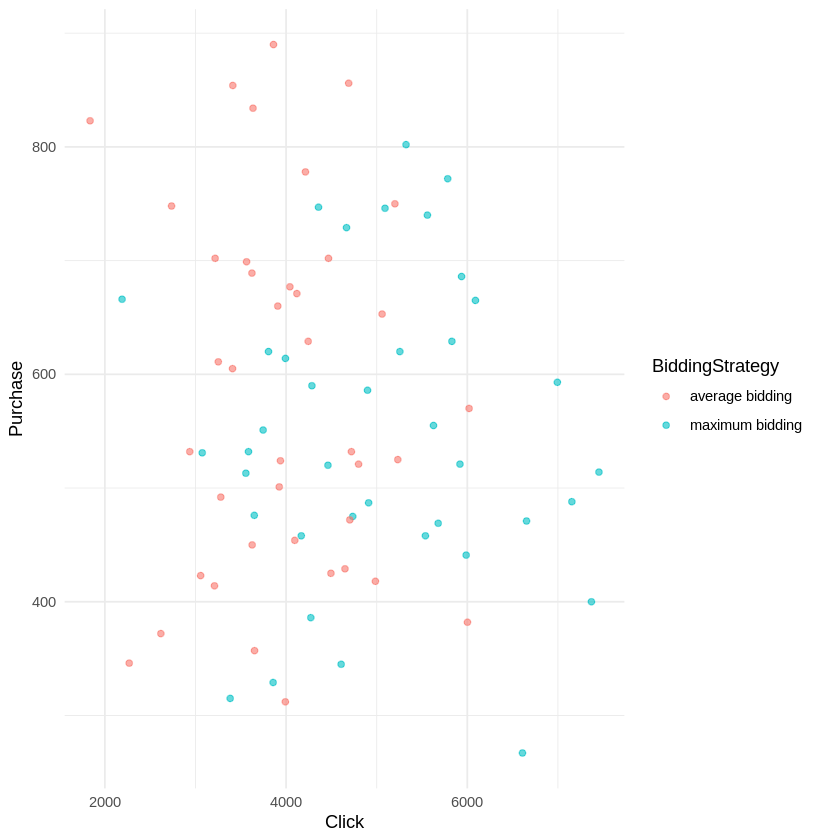

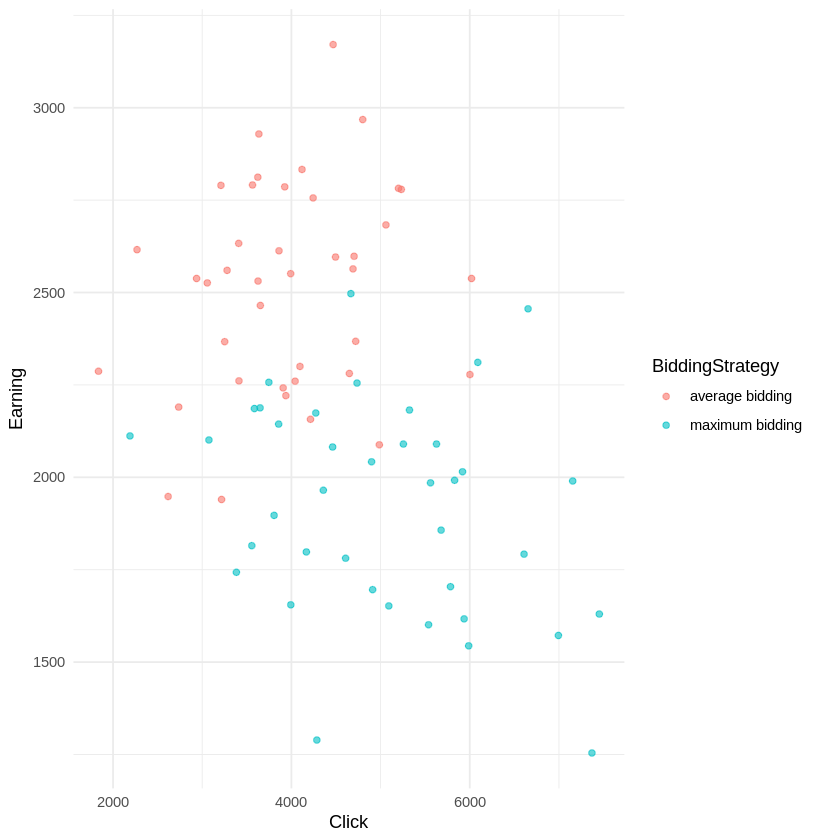

In [ ]:
# Impression vs Click
ggplot(data, aes(x = Impression, y = Click, color = BiddingStrategy)) +
  geom_point(alpha = 0.6) + theme_minimal()

# Click vs Purchase
ggplot(data, aes(x = Click, y = Purchase, color = BiddingStrategy)) +
  geom_point(alpha = 0.6) + theme_minimal()

# Click vs Earnings
ggplot(data, aes(x = Click, y = Earning, color = BiddingStrategy)) +
  geom_point(alpha = 0.6) + theme_minimal()

**Impression vs Click**

- Các điểm dữ liệu phân tán khá rộng, không tập trung gần một đường thẳng hay xu hướng rõ rệt.

- Một số điểm Impression thấp nhưng Click cao, và ngược lại.

-> Mối quan hệ giữa Impression và Click yếu, không có tương quan rõ ràng.

**Click vs Purchase**
- Dữ liệu rải rác, không hình thành xu hướng tăng tuyến tính.

- Một số trường hợp Click cao nhưng Purchase thấp, và ngược lại.

-> Mối quan hệ giữa Click và Purchase rất yếu, không rõ rệt.

**Click vs Earnings**

- Các điểm cũng phân tán rộng, không tạo thành xu hướng tăng rõ.

- Nhiều điểm Click cao nhưng Earnings thấp.

-> Mối quan hệ giữa Click và Earnings yếu, không có xu hướng đáng kể.

#3. Kiểm tra giả định thống kê

##3.1. Kiểm tra phân phối chuẩn (Normality)

In [ ]:
# Tách hai nhóm
control_data <- subset(data, BiddingStrategy == "maximum bidding")
test_data <- subset(data, BiddingStrategy == "average bidding")

# 1. CTR
wilcox.test(control_data$CTR, test_data$CTR, alternative = "two.sided")

# 2. Conversion Rate
wilcox.test(control_data$ConversionRate, test_data$ConversionRate, alternative = "two.sided")

# 3. Click (dù phân phối chuẩn, bạn vẫn yêu cầu dùng Mann-Whitney)
wilcox.test(control_data$Click, test_data$Click, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  control_data$CTR and test_data$CTR
W = 1268, p-value = 5.744e-07
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  control_data$ConversionRate and test_data$ConversionRate
W = 456, p-value = 0.001289
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  control_data$Click and test_data$Click
W = 1158, p-value = 0.0001532
alternative hypothesis: true location shift is not equal to 0


Giả thuyết:

H₀: Không có sự khác biệt về phân phối trung vị giữa hai nhóm bidding (maximum vs. average).

H₁: Có sự khác biệt đáng kể giữa hai nhóm.

Tiêu chí quyết định: Nếu p-value < 0.05, bác bỏ H₀ ⇒ Có sự khác biệt có ý nghĩa thống kê.

Kết quả & Đánh giá

| Biến                | W (Thống kê Wilcoxon) | p-value   | Kết luận thống kê                         |
| ------------------- | --------------------- | --------- | ----------------------------------------- |
| **CTR**             | 1268                  | 5.744e-07 | Bác bỏ H₀ → Có sự khác biệt rất đáng kể |
| **Conversion Rate** | 456                   | 0.001289  | Bác bỏ H₀ → Có sự khác biệt đáng kể     |
| **Click**           | 1158                  | 0.0001532 | Bác bỏ H₀ → Có sự khác biệt đáng kể     |


##3.2. Kiểm tra phương sai bằng nhau (Equality of variances)

In [ ]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(car)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




In [ ]:
# Levene's test cho các biến
leveneTest(Click ~ BiddingStrategy, data = data)
leveneTest(Purchase ~ BiddingStrategy, data=data)
leveneTest(Earning ~ BiddingStrategy, data = data)
leveneTest(CTR ~ BiddingStrategy, data = data)
leveneTest(ConversionRate ~ BiddingStrategy, data = data)

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,5.028075,0.02781713
,77,NA,NA


Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,3.024027,0.08603609
,77,NA,NA


Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.1106819,0.7402733
,77,NA,NA


Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,4.330638,0.04075692
,77,NA,NA


Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,1.922144,0.1696219
,77,NA,NA


In [ ]:
# So sánh trung bình khi phương sai không bằng nhau
t.test(Click ~ BiddingStrategy, data = data, var.equal = FALSE)
t.test(Earning ~ BiddingStrategy, data = data, var.equal = FALSE)
t.test(CTR ~ BiddingStrategy, data = data, var.equal = FALSE)
t.test(ConversionRate ~ BiddingStrategy, data = data, var.equal = FALSE)


	Welch Two Sample t-test

data:  Click by BiddingStrategy
t = -4.2495, df = 69.52, p-value = 6.535e-05
alternative hypothesis: true difference in means between group average bidding and group maximum bidding is not equal to 0
95 percent confidence interval:
 -1557.232  -562.335
sample estimates:
mean in group average bidding mean in group maximum bidding 
                     3967.550                      5027.333 



	Welch Two Sample t-test

data:  Earning by BiddingStrategy
t = 9.1477, df = 76.747, p-value = 6.404e-14
alternative hypothesis: true difference in means between group average bidding and group maximum bidding is not equal to 0
95 percent confidence interval:
 462.7888 720.3433
sample estimates:
mean in group average bidding mean in group maximum bidding 
                     2514.925                      1923.359 



	Welch Two Sample t-test

data:  CTR by BiddingStrategy
t = -4.2386, df = 56.059, p-value = 8.477e-05
alternative hypothesis: true difference in means between group average bidding and group maximum bidding is not equal to 0
95 percent confidence interval:
 -0.026984054 -0.009663861
sample estimates:
mean in group average bidding mean in group maximum bidding 
                   0.03417597                    0.05249993 



	Welch Two Sample t-test

data:  ConversionRate by BiddingStrategy
t = 3.0682, df = 68.438, p-value = 0.003084
alternative hypothesis: true difference in means between group average bidding and group maximum bidding is not equal to 0
95 percent confidence interval:
 0.01398951 0.06601735
sample estimates:
mean in group average bidding mean in group maximum bidding 
                    0.1565509                     0.1165475 


Giả thuyết:

H₀: Không có sự khác biệt về phân phối trung vị giữa hai nhóm bidding (maximum vs. average).

H₁: Có sự khác biệt đáng kể giữa hai nhóm.

Tiêu chí quyết định: Nếu p-value < 0.05, bác bỏ H₀ ⇒ Có sự khác biệt có ý nghĩa thống kê.

**Phân tích từng biến**
1. Click
- p-value < 0.001 → Có sự khác biệt rất có ý nghĩa thống kê.

- Nhóm maximum bidding có số click cao hơn (5027.3 vs. 3967.6).

- Chiến lược maximum hiệu quả hơn về số lượt người dùng nhấp vào quảng cáo.

2. Earning
- p-value < 2.2e-16 (gần bằng 0) → Sự khác biệt cực kỳ mạnh.

- Ngược lại, nhóm average bidding tạo ra doanh thu cao hơn (2514.9 vs. 1923.4).

- Điều này cho thấy rằng average bidding tuy ít click hơn, nhưng hiệu quả chuyển đổi cao hơn.

3. CTR (Click Through Rate)
- p-value rất nhỏ → Sự khác biệt có ý nghĩa.

- Nhóm maximum bidding có CTR cao hơn (0.0525 vs. 0.0342).

- Cho thấy maximum bidding tiếp cận người dùng hiệu quả hơn về tỷ lệ click.

4. Conversion Rate
- p-value = 0.0038 → Có sự khác biệt đáng kể.

- Nhóm average bidding có conversion rate cao hơn (0.1566 vs. 0.1165).

- Mặc dù ít người nhấp chuột, nhưng nhóm này lại có chất lượng người dùng tốt hơn

##3.3. Kiểm tra đa cộng tuyến (Multicollinearity - VIF)

In [ ]:
# Mô hình hồi quy mẫu: Earnings ~ Impression + Click
model <- lm(Earning ~ Impression + Click, data = data)

# Kiểm tra VIF
vif(model)

Impression      Click 
  1.175205   1.175205

Giả thuyết:

| VIF giá trị       | Mức độ đa cộng tuyến           | Kết luận                        |
| ----------------- | ------------------------------ | ------------------------------- |
| **VIF < 5**       | Không đáng kể                  | Không có đa cộng tuyến        |
| VIF từ 5 đến < 10 | Đáng chú ý, cần xem xét kỹ hơn | Có thể có đa cộng tuyến yếu   |
| **VIF ≥ 10**      | Nghiêm trọng                   | Có đa cộng tuyến nghiêm trọng |

Kết luận:

Cả Impression và Click đều có VIF ≈ 1.18, rất thấp.

Điều này cho thấy hai biến độc lập không có hiện tượng đa cộng tuyến.

-> Có thể sử dụng hai biến này đồng thời trong mô hình hồi quy tuyến tính.

#4. Thực hiện kiểm nghiệm thống kê

## 4.1. Kiểm định hai giá trị trung bình tổng thể

### Câu hỏi 1: Chiến lược giá thầu nào thu hút được nhiều lược nhấp chuột hơn?

**Biến phân tích**: `Click`  
**Kiểm định sử dụng**: Welch’s t-test

In [ ]:
# Đối với biến Click có phương sai khác nhau, sử dụng Welch's t-test
t.test(Click ~ BiddingStrategy, data = data, var.equal = FALSE)


	Welch Two Sample t-test

data:  Click by BiddingStrategy
t = -4.2495, df = 69.52, p-value = 6.535e-05
alternative hypothesis: true difference in means between group average bidding and group maximum bidding is not equal to 0
95 percent confidence interval:
 -1557.232  -562.335
sample estimates:
mean in group average bidding mean in group maximum bidding 
                     3967.550                      5027.333 


#### Kết quả kiểm định
| Thống kê             | Giá trị                |
|----------------------|------------------------|
| t-statistic          | -4.25                  |
| Bậc tự do (df)       | 69.52                  |
| p-value              | 0.00006535             |
| CI 95% (hiệu số TB)  | [-1557.23, -562.34]    |

---

#### Kết luận thống kê
- Vì **p-value < 0.05**, ta **bác bỏ giả thuyết H₀**.
- Có sự **khác biệt có ý nghĩa thống kê** về số lượt nhấp giữa hai chiến lược giá thầu.

---

#### So sánh trung bình giữa hai nhóm
| Chiến lược giá thầu     | Trung bình Click |
|--------------------------|------------------|
| Average Bidding (Test)   | ≈ 3967.55        |
| Maximum Bidding (Control)| ≈ 5027.33        |

---

#### Diễn giải thực tế
Chiến lược **maximum bidding** thu hút được nhiều lược nhấp hơn, với chênh lệch dao động **từ 562 đến 1557 lược nhấp**, nghiêng rõ rệt về phía maximum bidding.

### Câu hỏi 2: Chiến lược giá thầu nào mang lại nhiều đơn hàng hơn?

**Biến phân tích**: `Purchase`  
**Kiểm định sử dụng**: Student’s t-test

In [ ]:
# Đối với biến Purchase có phương sai bằng nhau, dùng Student's t-test
t.test(Purchase ~ BiddingStrategy, data = data, var.equal = TRUE)


	Two Sample t-test

data:  Purchase by BiddingStrategy
t = 1.0739, df = 77, p-value = 0.2862
alternative hypothesis: true difference in means between group average bidding and group maximum bidding is not equal to 0
95 percent confidence interval:
 -30.51246 101.94580
sample estimates:
mean in group average bidding mean in group maximum bidding 
                     582.0500                      546.3333 


#### Kết quả kiểm định
| Thống kê             | Giá trị                |
|----------------------|------------------------|
| t-statistic          | 1.07                  |
| Bậc tự do (df)       | 77                  |
| p-value              | 0.29             |
| CI 95% (hiệu số TB)  | [-30.51, 101.95]    |

---

#### Kết luận thống kê
- Vì **p-value > 0.05**, ta **không có đủ bằng chứng để bác bỏ giả thuyết H₀**.
- Không có sự **khác biệt có ý nghĩa thống kê** về số lượt nhấp giữa hai chiến lược giá thầu.

---

#### So sánh trung bình giữa hai nhóm
| Chiến lược giá thầu     | Trung bình Purchase |
|--------------------------|------------------|
| Average Bidding (Test)   | ≈ 582.05         |
| Maximum Bidding (Control)| ≈ 546.33        |

---

#### Diễn giải thực tế
Mặc dù nhóm **average bidding** có trung bình số đơn hàng cao hơn một chút, nhưng sự khác biệt này **không đáng kể** về mặt thống kê.  
Chiến lược giá thầu **không ảnh hưởng rõ ràng** đến số đơn hàng tạo ra trong thử nghiệm này.

### Câu hỏi 3: Chiến lược giá thầu nào mang lại doanh thu cao hơn?

**Biến phân tích**: `Earning`  
**Kiểm định sử dụng**: Student’s t-test

In [ ]:
# Đối với biến Earning có phương sai bằng nhau, dùng Student's t-test
t.test(Earning ~ BiddingStrategy, data = data, var.equal = TRUE)


	Two Sample t-test

data:  Earning by BiddingStrategy
t = 9.1515, df = 77, p-value = 6.125e-14
alternative hypothesis: true difference in means between group average bidding and group maximum bidding is not equal to 0
95 percent confidence interval:
 462.848 720.284
sample estimates:
mean in group average bidding mean in group maximum bidding 
                     2514.925                      1923.359 


#### Kết quả kiểm định

| Thống kê             | Giá trị                     |
|----------------------|-----------------------------|
| t-statistic          | 9.152                       |
| Bậc tự do (df)       | 77                          |
| p-value              | 6.13 × 10⁻¹⁴ (**rất nhỏ**) |
| CI 95% (hiệu số TB)  | [462.85, 720.28]            |

---

#### Kết luận thống kê
- Vì **p-value < 0.05**, ta **bác bỏ giả thuyết H₀**.
- Có sự khác biệt **có ý nghĩa thống kê** về doanh thu giữa hai chiến lược giá thầu.

---

#### So sánh trung bình giữa hai nhóm
| Chiến lược giá thầu     | Trung bình Earning |
|--------------------------|---------------------|
| Average Bidding (Test)   | 2,514.93            |
| Maximum Bidding (Control)| 1,923.36            |

---

#### Diễn giải thực tế
Chiến lược **average bidding** tạo ra mức **doanh thu cao hơn đáng kể** so với maximum bidding.  
Sự khác biệt này không chỉ thống kê có ý nghĩa mà còn **thực tế rõ rệt**, gợi ý rằng doanh nghiệp có thể cân nhắc áp dụng average bidding để tối ưu hóa hiệu quả tài chính.


### Câu hỏi 4: CTR của chiến lược nào cao hơn?

**Biến phân tích**: `CTR = Click / Impression`  
**Kiểm định sử dụng**: Welch’s t-test

In [ ]:
# Đối với biến CTR có phương sai khác nhau, dùng Welch's t-test
t.test(CTR ~ BiddingStrategy, data = data, var.equal = FALSE)


	Welch Two Sample t-test

data:  CTR by BiddingStrategy
t = -4.2386, df = 56.059, p-value = 8.477e-05
alternative hypothesis: true difference in means between group average bidding and group maximum bidding is not equal to 0
95 percent confidence interval:
 -0.026984054 -0.009663861
sample estimates:
mean in group average bidding mean in group maximum bidding 
                   0.03417597                    0.05249993 


#### Kết quả kiểm định

| Thống kê             | Giá trị                      |
|----------------------|------------------------------|
| t-statistic          | -4.239                       |
| Bậc tự do (df)       | 56.059                       |
| p-value              | 8.48 × 10⁻⁵ (**rất nhỏ**)    |
| CI 95% (hiệu số TB)  | [-0.0270, -0.0097]           |

---

#### Kết luận thống kê
- Vì **p-value < 0.05**, ta **bác bỏ giả thuyết H₀**.
- Có sự khác biệt **có ý nghĩa thống kê** về CTR giữa hai chiến lược giá thầu.

---

#### So sánh trung bình CTR giữa hai nhóm

| Chiến lược giá thầu     | CTR trung bình |
|--------------------------|----------------|
| Average Bidding (Test)   | 0.03418        |
| Maximum Bidding (Control)| 0.05250        |

---

#### Diễn giải thực tế:
Chiến lược **maximum bidding** có **CTR trung bình cao hơn** so với average bidding.  
Điều này cho thấy maximum bidding có thể hiệu quả hơn trong việc **thu hút lượt nhấp trên mỗi lần hiển thị**.

### Câu hỏi 5: Chiến lược giá thầu nào mang lại doanh thu cao hơn?

**Biến phân tích**: `ConversionRate = Purchase / Click`  
**Kiểm định sử dụng**: Student’s t-test

In [ ]:
# Đối với biến ConversionRate có phương sai bằng nhau, dùng Student's t-test
t.test(ConversionRate ~ BiddingStrategy, data = data, var.equal = TRUE)


	Two Sample t-test

data:  ConversionRate by BiddingStrategy
t = 3.0534, df = 77, p-value = 0.003106
alternative hypothesis: true difference in means between group average bidding and group maximum bidding is not equal to 0
95 percent confidence interval:
 0.01391545 0.06609140
sample estimates:
mean in group average bidding mean in group maximum bidding 
                    0.1565509                     0.1165475 


#### Kết quả kiểm định thống kê

| Thống kê             | Giá trị                      |
|----------------------|------------------------------|
| t-statistic          | -3.0534                       |
| Bậc tự do (df)       | 77                        |
| p-value              | 0.0003106 (**< 0.05**)         |
| CI 95% (hiệu số TB)  | [-0.014, -0.066]           |

---

#### Kết luận thống kê:
- Vì **p-value < 0.05**, ta **bác bỏ giả thuyết H₀**.
- Có sự khác biệt **có ý nghĩa thống kê** về Conversion Rate giữa hai chiến lược giá thầu.

---

#### So sánh Conversion Rate trung bình giữa hai nhóm

| Chiến lược giá thầu     | Conversion Rate trung bình |
|--------------------------|-----------------------------|
| Average Bidding (Test)   | 0.1566                      |
| Maximum Bidding (Control)| 0.1165                      |

---

#### Diễn giải thực tế:
Chiến lược **average bidding** có **tỷ lệ chuyển đổi cao hơn** so với maximum bidding.

##4.2. Mô hình hồi quy tuyến tính

Bài toán: Chiến lược giá thầu có ảnh hưởng đến doanh thu sau khi đã biết số click và impression không?

In [ ]:
Earning ~ Impression + Click + BiddingStrategy

Earning ~ Impression + Click + BiddingStrategy

Giả thuyết:

H₀: Chiến lược giá thầu không ảnh hưởng đến doanh thu (hệ số = 0).

H₁: Chiến lược giá thầu có ảnh hưởng đến doanh thu (hệ số ≠ 0).

###Bước 1: Chuyển BiddingStrategy thành biến phân loại

In [ ]:
# Đảm bảo biến là factor
data$BiddingStrategy <- as.factor(data$BiddingStrategy)

###Bước 2: Xây dựng mô hình hồi quy

In [ ]:
# Mô hình hồi quy tuyến tính
model_earn <- lm(Earning ~ Impression + Click + BiddingStrategy, data = data)

# Tóm tắt kết quả
summary(model_earn)


Call:
lm(formula = Earning ~ Impression + Click + BiddingStrategy, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-665.08 -239.14   48.55  205.62  626.77 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     2.457e+03  2.712e+02   9.060 1.15e-13 ***
Impression                      1.003e-03  1.740e-03   0.576    0.566    
Click                          -1.591e-02  3.083e-02  -0.516    0.607    
BiddingStrategymaximum bidding -5.564e+02  7.626e+01  -7.295 2.59e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 289.5 on 75 degrees of freedom
Multiple R-squared:  0.526,	Adjusted R-squared:  0.507 
F-statistic: 27.74 on 3 and 75 DF,  p-value: 3.557e-12


**Mô hình:** `Earning ~ Impression + Click + BiddingStrategy`

| Biến                             | Estimate    | Std. Error | t value | Pr         | Ý nghĩa              |
|----------------------------------|------------|------------|---------|------------|----------------------|
| (Intercept)                      | 2,457.00          | 271.20     | 9.060   | 1.15e-13      | *** Rất có ý nghĩa   |
| Impression                       | 0.001003      | 0.001740   | 0.576   | 0.566         | Không có ý nghĩa     |
| Click                            | -0.01591       | 0.03083    | -0.516  | 0.607         | Không có ý nghĩa     |
| BiddingStrategy: maximum bidding | -556.40          | 76.26      | -7.295  | 2.59e-10      | *** Rất có ý nghĩa   |

---

Nhận xét:

* Trong mô hình này, **chỉ có biến BiddingStrategy** (cụ thể là chiến lược *maximum bidding*) là có ảnh hưởng **rất có ý nghĩa thống kê** đến biến phụ thuộc **Earning** (p-value = 2.59e-10).
* Hai biến **Impression** và **Click** có hệ số không ý nghĩa (p > 0.05), cho thấy khi đã kiểm soát BiddingStrategy thì **số lượt hiển thị** và **số lượt nhấp** không còn ảnh hưởng đáng kể đến doanh thu.
* Hệ số điều chỉnh R² là 0.507 cho thấy mô hình giải thích được khoảng **50.7% phương sai** trong biến Earning — một mức độ khá cao trong bối cảnh dữ liệu thực nghiệm.
* **Chiến lược giá thầu** rõ ràng có tác động **độc lập và mạnh mẽ** đến doanh thu, khẳng định vai trò quan trọng của nó trong tối ưu chiến dịch quảng cáo.

## 4.3. Phân tích hiệp biến

In [ ]:
# Phân tích hiệp biến ANCOVA
# Bài toán: Chiến lược giá thầu có ảnh hưởng độc lập đến doanh thu không, sau khi đã kiểm soát Impression và Click?
# Đảm bảo biến nhóm là factor
data$BiddingStrategy <- as.factor(data$BiddingStrategy)

# Xây dựng mô hình ANCOVA: Earnings ~ Impression + Click + BiddingStrategy
ancova_earn <- aov(Earning ~ Impression + Click + BiddingStrategy, data=data)

# Kết quả
summary(ancova_earn)

                Df  Sum Sq Mean Sq F value   Pr(>F)    
Impression       1 1728406 1728406  20.618 2.10e-05 ***
Click            1  786829  786829   9.386  0.00304 ** 
BiddingStrategy  1 4461525 4461525  53.222 2.59e-10 ***
Residuals       75 6287156   83829                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

#### Phân tích hiệp biến (ANCOVA)

**Mô hình:** `Earning ~ Impression + Click + BiddingStrategy`

| Biến             | Df  | Sum Sq   | Mean Sq  | F value | Pr(>F)     | Ý nghĩa        |
|------------------|-----|----------|----------|---------|------------|----------------|
| Impression       | 1   | 1,728,406| 1,728,406| 20.618  | 2.10e-05   | *** Rất có ý nghĩa |
| Click            | 1   |   786,829|   786,829|  9.386  | 0.00304    | ** Có ý nghĩa   |
| BiddingStrategy  | 1   | 4,461,525| 4,461,525| 53.222  | 2.59e-10   | *** Rất có ý nghĩa |
| Residuals        | 75  | 6,287,156|    83,829|         |            |                |

---

#### Nhận xét:

- Cả 3 biến **Impression**, **Click**, và **BiddingStrategy** đều có ảnh hưởng có ý nghĩa thống kê đến **Earning** khi được đưa vào mô hình cùng lúc.
- Đặc biệt, **BiddingStrategy** có F = 53.22 với p-value rất nhỏ (**2.59e-10**), cho thấy ảnh hưởng mạnh mẽ và độc lập của loại chiến lược giá thầu đến doanh thu ngay cả khi đã kiểm soát Impression và Click.
- Điều này ủng hộ việc **sử dụng ANCOVA** để tách biệt tác động của chiến lược giá thầu so với các yếu tố liên quan khác.


In [ ]:
# Phân tích hiệp biến ANCOVA
# Bài toán: Chiến lược giá thầu có ảnh hưởng đến Conversion Rate không, sau khi kiểm soát Impression và Click
# Xây dựng mô hình ANCOVA: ConversionRate ~ Impression + Click + BiddingStrategy
ancova_cr <- aov(ConversionRate ~ Impression + Click + BiddingStrategy, data=data)

# Kết quả
summary(ancova_cr)

                Df  Sum Sq Mean Sq F value   Pr(>F)    
Impression       1 0.02725 0.02725  12.960 0.000568 ***
Click            1 0.10750 0.10750  51.129 4.85e-10 ***
BiddingStrategy  1 0.00015 0.00015   0.071 0.790504    
Residuals       75 0.15769 0.00210                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### Phân tích hiệp biến (ANCOVA) – Conversion Rate

**Mô hình:** `ConversionRate ~ Impression + Click + BiddingStrategy`

| Biến             | Df  | Sum Sq  | Mean Sq | F value | Pr(>F)   | Ý nghĩa          |
|------------------|-----|---------|---------|---------|----------|------------------|
| Impression       | 1   | 0.02725 | 0.02725 | 12.960  | 0.000568 | *** Rất có ý nghĩa |
| Click            | 1   | 0.10750 | 0.10750 | 51.129  | 4.85e-10 | *** Rất có ý nghĩa |
| BiddingStrategy  | 1   | 0.00015 | 0.00015 |  0.071  | 0.790504 | Không có ý nghĩa |
| Residuals        | 75  | 0.15769 | 0.00210 |         |          |                  |

---

### Nhận xét:

- **Impression** và **Click** đều có ảnh hưởng đáng kể đến **Conversion Rate**, với p-value rất nhỏ và F-value cao.
- Ngược lại, **BiddingStrategy** có p-value = 0.79, tức là không có ảnh hưởng độc lập có ý nghĩa thống kê đến Conversion Rate khi đã kiểm soát Impression và Click.
- Điều này cho thấy việc thay đổi chiến lược giá thầu không đủ để tác động đến tỷ lệ chuyển đổi nếu số lần hiển thị và lượt nhấp đã được kiểm soát.


# Đánh giá hiệu quả thực nghiệm

## 5.1. Đo lường mức độ ảnh hưởng

In [ ]:
# Sử dụng thư viện effsize
if (!require(effsize)) install.packages("effsize")
library(effsize)

Loading required package: effsize



In [ ]:
# Tính Cohen's d cho các biến
cohen.d(Click ~ BiddingStrategy, data = data)
cohen.d(Purchase ~ BiddingStrategy, data = data)
cohen.d(Earning ~ BiddingStrategy, data = data)
cohen.d(CTR ~ BiddingStrategy, data = data)
cohen.d(ConversionRate ~ BiddingStrategy, data = data)


Cohen's d

d estimate: -0.960028 (large)
95 percent confidence interval:
    lower     upper 
-1.433236 -0.486820 



Cohen's d

d estimate: 0.2416573 (small)
95 percent confidence interval:
     lower      upper 
-0.2080782  0.6913927 



Cohen's d

d estimate: 2.059406 (large)
95 percent confidence interval:
   lower    upper 
1.505122 2.613690 



Cohen's d

d estimate: -0.9610735 (large)
95 percent confidence interval:
     lower      upper 
-1.4343348 -0.4878122 



Cohen's d

d estimate: 0.6871236 (medium)
95 percent confidence interval:
    lower     upper 
0.2259891 1.1482580 


#### Kết quả đo lường mức độ ảnh hưởng (Cohen's d)

| Câu hỏi | Biến phân tích      | Cohen’s d | Mức độ ảnh hưởng | 95% CI              | Nhóm tốt hơn        | Ghi chú                                                     |
|---------|---------------------|-----------|-------------------|---------------------|----------------------|-------------------------------------------------------------|
| Câu 1   | Click               | -0.960    | Lớn               | [-1.433, -0.487]    | Maximum bidding      | Maximum bidding có số click cao hơn đáng kể               |
| Câu 2   | Purchase            | 0.242     | Nhỏ               | [-0.208, 0.691]     | Không rõ ràng        | Khác biệt nhỏ, không đủ mạnh để kết luận chắc chắn        |
| Câu 3   | Earnings            | 2.059     | Rất lớn           | [1.505, 2.614]      | Average bidding       | Average bidding tạo ra doanh thu vượt trội rõ ràng        |
| Câu 4   | CTR                 | -0.961    | Lớn               | [-1.434, -0.488]    | Maximum bidding      | Maximum bidding có hiệu quả thu hút click tốt hơn         |
| Câu 5   | Conversion Rate     | 0.687     | Vừa               | [0.226, 1.148]      | Average bidding       | Average bidding có tỷ lệ chuyển đổi tốt hơn               |


## 5.2. Tính khoảng tin cậy 95%

In [ ]:
library(dplyr)

In [ ]:
# Tính khoảng tin cậy
summary_CI <- data %>%
  group_by(BiddingStrategy) %>%
  summarise(
    Mean_Earning = mean(Earning),
    SD = sd(Earning),
    N = n(),
    SE = SD / sqrt(N),
    CI_lower = Mean_Earning - qt(0.975, N - 1) * SE,
    CI_upper = Mean_Earning + qt(0.975, N - 1) * SE
  )

  # In kết quả
print(summary_CI)

# A tibble: 2 × 7
  BiddingStrategy Mean_Earning    SD     N    SE CI_lower CI_upper
  <fct>                  <dbl> <dbl> <int> <dbl>    <dbl>    <dbl>
1 average bidding        2515.  283.    40  44.7    2425.    2605.
2 maximum bidding        1923.  292.    39  46.7    1829.    2018.


#### Thống kê mô tả Earnings theo chiến lược giá thầu

| Bidding Strategy   | Mean Earnings | SD     | N  | SE   | 95% CI (Lower - Upper) |
|--------------------|---------------|--------|----|------|-------------------------|
| Average Bidding    | 2514.93       | 282.76 | 40 | 44.69| [2425.20 – 2604.66]     |
| Maximum Bidding    | 1923.36       | 292.29 | 39 | 46.77| [1829.11 – 2017.60]     |

#### Nhận xét
- **Average bidding** tạo ra doanh thu trung bình cao hơn rõ rệt (**2514.93** so với **1923.36**) so với **maximum bidding**.
- **Khoảng tin cậy 95%** giữa hai nhóm **không trùng nhau**, củng cố thêm bằng chứng về sự khác biệt có ý nghĩa thống kê.
- **Độ lệch chuẩn (SD)** của hai nhóm tương đương (~283 và ~292), cho thấy mức biến động doanh thu giữa các chiến dịch là tương đối giống nhau.
- **Sai số chuẩn (SE)** nhỏ (≈45–47) giúp khoảng tin cậy hẹp, tăng độ tin cậy cho trung bình mẫu.


# Khuyến nghị

## Khuyến nghị Chiến lược Giá thầu

Dựa trên các phân tích thống kê và mô hình hồi quy, nhóm đưa ra các khuyến nghị cụ thể cho từng mục tiêu marketing như sau:

---

### Mục tiêu 1: **Tăng số lượt nhấp vào quảng cáo (Click)**

- **Khuyến nghị:** Sử dụng `Maximum bidding`
- **Vì sao?**
  - Chiến lược này đạt **tỷ lệ nhấp (CTR) trung bình cao hơn rõ rệt**: **5.25%** so với **3.42%**
  - Sự khác biệt này **có ý nghĩa thống kê rất cao** (*p* < 0.001) và **hiệu ứng lớn** (Cohen’s *d* ≈ 0.96)
- **Phù hợp với:**
  - Chiến dịch cần **tăng độ hiển thị thương hiệu**, **lan tỏa thông điệp**
  - Khi **mục tiêu là tiếp cận và thu hút càng nhiều lượt nhấp càng tốt**

---

### Mục tiêu 2: **Tối đa hóa doanh thu từ quảng cáo (Earnings)**

- **Khuyến nghị:** Sử dụng `Average bidding`
- **Vì sao?**
  - Doanh thu trung bình cao hơn đáng kể: **2,515** vs **1,923**
  - Sự khác biệt **có ý nghĩa thống kê rất mạnh** (*p* < 0.0001), với **hiệu ứng cực lớn** (Cohen’s *d* ≈ 2.06)
  - Mô hình hồi quy và ANCOVA cũng xác nhận: **ngay cả sau khi kiểm soát số lượt nhấp và lượt hiển thị, chiến lược bidding vẫn tác động rõ rệt đến doanh thu**
- **Phù hợp với:**
  - Các chiến dịch **tối ưu chi phí – lợi nhuận**
  - Doanh nghiệp muốn **thu nhiều doanh thu hơn trên mỗi quảng cáo được hiển thị**

---

### Mục tiêu 3: **Tăng tỷ lệ chuyển đổi sau khi nhấp (Conversion Rate)**

- **Khuyến nghị:** Sử dụng `Average bidding`
- **Vì sao?**
  - Tỷ lệ chuyển đổi trung bình cao hơn: **15.7%** so với **11.7%**
  - Đây là sự khác biệt **có ý nghĩa thống kê** (*p* < 0.01), với **hiệu ứng vừa phải** (Cohen’s *d* ≈ 0.69)
  - Tuy nhiên, **khi đưa vào mô hình ANCOVA và kiểm soát các yếu tố như Impression và Click**, chiến lược bidding **không còn ảnh hưởng đáng kể** (*p* ≈ 0.79)
  - Điều này cho thấy: **số lần hiển thị và số lượt nhấp là yếu tố chính điều khiển Conversion Rate**, không hoàn toàn là do loại bidding
- **Phù hợp với:**
  - Chiến dịch hướng đến **chốt đơn**, **đăng ký**, **mua ngay** – nơi mục tiêu là **biến nhấp chuột thành hành động cụ thể**

---

### Tổng kết

|  Mục tiêu chính                        |  Chiến lược đề xuất |  Lý do chính                                 |
|-----------------------------------------|------------------------|------------------------------------------------|
| Tăng lượt nhấp (Click)                  | Maximum bidding        | CTR cao hơn, hiệu ứng lớn, tăng thu hút ban đầu |
| Tối đa hóa doanh thu (Earnings)         | Average bidding        | Doanh thu cao hơn, kiểm chứng cả qua mô hình   |
| Tăng tỷ lệ chuyển đổi (Conversion Rate) | Average bidding        | CR cao hơn, nhưng phụ thuộc vào Click & Impression |
